# Ekstraksi Kata Kunci

*   **NLTK** berfungsi fungsi untuk melakukan tugas-tugas seperti tokenisasi, stemming, lemmatization, analisis sentimen, pengenalan entitas, dan banyak lagi.
*   **Pandas** menyediakan cara yang efisien untuk mengelola dan menganalisis data tabular seperti dataframe.
*   **CountVectorizer** untuk melakukan ekstraksi fitur dalam bentuk term frequency.
*   **numpy** untuk array dan operasi matematika pada array.
*   **re** Ekspresi reguler digunakan untuk pencocokan pola string dan manipulasi teks.
*   **networkx** adalah pustaka Python yang digunakan untuk analisis jaringan atau graf.







In [2]:
import nltk
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import re
import networkx as nx
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
data = pd.read_csv("/content/drive/MyDrive/ppw/tugas/tugas_ppw/suararakyat.csv")
data

,Judul,Isi,Kategori
0,"Hadiri Seminar Nasional, Slamet Ariyadi Gemble...","PAMEKASAN,Suararakyat.id– Slamet Ariyadi luang...",Pendidikan
1,SIAP !! Cerdaskan Siswa-Siswi SD Negeri Giliba...,Mahasiswa UTM adakan Gerakan Memasyarakatkan M...,Pendidikan
2,Direktur Pasca Sarjana IAIN Madura Ajak Mahasi...,"PAMEKASAN,Suararakyat.id– Kegiatan Kuliah Peng...",Pendidikan
3,MK Tolak Gugatan Usia Minimal Capres-Cawapres ...,"JAKARTA, Suararakyat.id–Mahkamah Konstitusi (M...",Politik
4,Sukes Gelar Festival Nasyid Islami :Al-Amin Al...,"SUMENEP,Suararakyat.id– Dalam Rangka Memeriahk...",Pendidikan
...,...,...,...
140,MK Tolak Gugatan Usia Minimal Capres-Cawapres ...,"JAKARTA, Suararakyat.id–Mahkamah Konstitusi (M...",Politik
141,BEM SI Akan Gelar Aksi Demo Besar-Besaran pada...,"JAKARTA, Suararakyat.id– Badan Eksekutif Mahas...",Politik
142,Sportif Cup 2022 : Tim Voli Remaja BPRS siap T...,"SUMENEP,Suararakyat.id– Tim kuat Remaja BPRS a...",Sport
143,"Bupati Sumenep Buka JJC, Minta Guru Memberikan...","SUMENEP,Suararakyat.id– Dinas Pendidikan (Disd...",Pendidikan


In [4]:
data1=data.head(1)
data1

,Judul,Isi,Kategori
0,"Hadiri Seminar Nasional, Slamet Ariyadi Gemble...","PAMEKASAN,Suararakyat.id– Slamet Ariyadi luang...",Pendidikan


## Preprocessing



re.sub ['^a-zA-Z\s'] ini akan menghapus semua karakter non-abjad (tidak termasuk spasi) dari teks masukan.

In [5]:
#Remove Puncutuation
clean_symbol = re.compile('[^a-zA-Z\s]')
def clean_punct(text):
    text = clean_symbol.sub(' ', text).lower()
    return text
# Buat kolom tambahan untuk data description yang telah diremovepunctuation
preprocessing = data1['Isi'].apply(clean_punct)
clean=pd.DataFrame(preprocessing)
clean

,Isi
0,pamekasan suararakyat id slamet ariyadi luang...


*   Dilakukan proses tokenisasi setiap kalimat.
*   Hasil tokenisasi dilakukan penghapusan kata yang tidak penting



In [6]:
# Unduh stop words dari nltk
stop_words = set(stopwords.words('indonesian'))
# Fungsi untuk menghapus stop words dari setiap kalimat
def remove_stopwords(sentence):
    words = word_tokenize(sentence)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Terapkan fungsi pada kolom 'Kalimat' dalam DataFrame
stopword = clean['Isi'].apply(remove_stopwords)
df=pd.DataFrame(stopword)
df

,Isi
0,pamekasan suararakyat id slamet ariyadi luangk...


## Term Frequency

Data yang telah dilakukan preprocssing akan masuk ke dalam proses term frequency, dimana setiap kata dihitung jumlah kemunculannya didalam dokumen

In [7]:
# Menghitung matriks co-occurrence dengan CountVectorizer
vectorizer = CountVectorizer()
co_occurrence_matrix = vectorizer.fit_transform(df['Isi']).T * vectorizer.fit_transform(df['Isi'])

# Membuat DataFrame dari matriks co-occurrence
df_co_occurrence = pd.DataFrame(co_occurrence_matrix.toarray(), columns=vectorizer.get_feature_names_out(),index=vectorizer.get_feature_names_out())
df_co_occurrence

,acara,acuh,adaptif,anti,ariyadi,asing,audiens,auditorium,badan,bangsa,...,the,tujuan,tunggulah,tutupnya,unira,universitas,warga,wib,yasin,yulianto
acara,25,10,5,10,15,5,5,5,5,10,...,5,10,5,5,15,40,5,5,15,10
acuh,10,4,2,4,6,2,2,2,2,4,...,2,4,2,2,6,16,2,2,6,4
adaptif,5,2,1,2,3,1,1,1,1,2,...,1,2,1,1,3,8,1,1,3,2
anti,10,4,2,4,6,2,2,2,2,4,...,2,4,2,2,6,16,2,2,6,4
ariyadi,15,6,3,6,9,3,3,3,3,6,...,3,6,3,3,9,24,3,3,9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
universitas,40,16,8,16,24,8,8,8,8,16,...,8,16,8,8,24,64,8,8,24,16
warga,5,2,1,2,3,1,1,1,1,2,...,1,2,1,1,3,8,1,1,3,2
wib,5,2,1,2,3,1,1,1,1,2,...,1,2,1,1,3,8,1,1,3,2
yasin,15,6,3,6,9,3,3,3,3,6,...,3,6,3,3,9,24,3,3,9,6


Pembentukan Graph : Setiap kata yang memiliki hubungan dengan kata lain dan nilai Term frequency lebih dari 5 akan dibentuk node yang saling terhubung

In [8]:
G = nx.Graph()
for idx, row in df_co_occurrence.iterrows():
    for col in df_co_occurrence.columns:
        weight = df_co_occurrence.loc[idx, col]
        if weight > 5 and idx != col:
            G.add_edge(idx, col, weight=weight)

**Pagerank** digunakan untuk menghitung nilai pentingnya suatu kata dalam dokumen.

Graph yang sudah terbentuk akan di hitung nilai pageranknya, dan diambil 3 kata yang memiliki nilai pagerank tertinggi.

In [9]:
pr = nx.pagerank(G)
sorted_d = sorted(pr.items(), key=lambda x: x[1], reverse=True)[:3]
sorted_d

[('mahasiswa', 0.08600959983500127),
 ('madura', 0.07100693104971584),
 ('universitas', 0.06342811228898347)]

Berikut adalah gambar graph yang dihasilkan dari hubungan antar kata yang memiliki nilai TF lebih dari 5

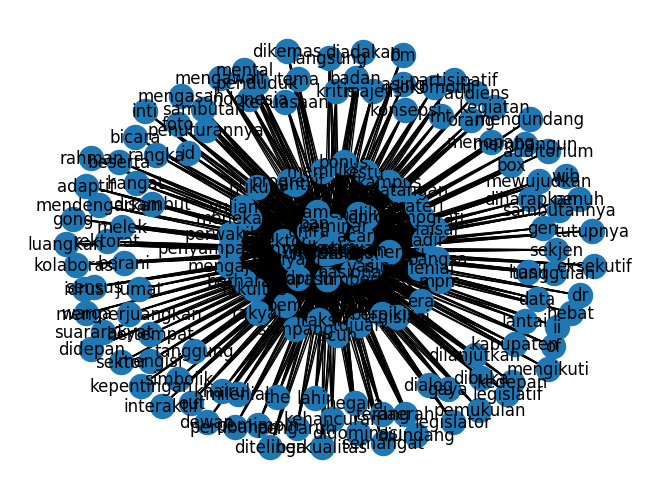

In [10]:
nx.draw(G,with_labels=True)